In [1]:
import numpy as np
import re
import os
from FoamCase import FoamTimeSave
from MLUtilities import MLDataSet
from FoamCase import FoamLineComparison

In [5]:
flatPlateDataset = MLDataSet("../CBFS/postProcess", "../CBFS/downsample", time = 0)
flatPlateDataset.geometric_downsample(wallmin=0.01, wallmax=1.0, 
                        xmin=0.0, xmax=5.0,
                        ymin=0.0, ymax=2.0,
                        zmin=0.5, zmax=0.51)

In [7]:
flatPlateDataset.downsample_based_on_label(label="Db", 
                                           features=["lambda1", "lambda2", "lambda5", 
                                                     "ReW", "rd", "Farg1", "Farg2"],
                                           from_geo_ds=True,
                                           trivialValue=1.0,
                                           ratio = 4.0)


(1165,)


In [6]:
CBFSlines = FoamLineComparison(case_paths=["../../../FI/CBFS-NL", "../../../FI/CBFS-NL"],
                               times = [1000, 2000], names = ["SST-NL", "FI"],
                               RefPath = "../../labels/", RefName="CBFS_13700",
                               lines = {
                                   "x1p5":
                                    {
                                        "start": [1.5, 0.721],
                                        "end":   [1.5, 1.500]
                                    },
                                   "x2p5":
                                    {
                                        "start": [2.5, 0.161],
                                        "end":   [2.5, 1.500]
                                    },
                                    "x3p3":
                                    {
                                        "start": [3.3, 0.000],
                                        "end":   [3.3, 1.500]
                                    },
                                    "x4p0":
                                    {
                                        "start": [4.0, 0.000],
                                        "end":   [4.0, 1.500]
                                    },
                               }
                               )
CBFSlines.extractLine(npCase=200, refSkip=10)

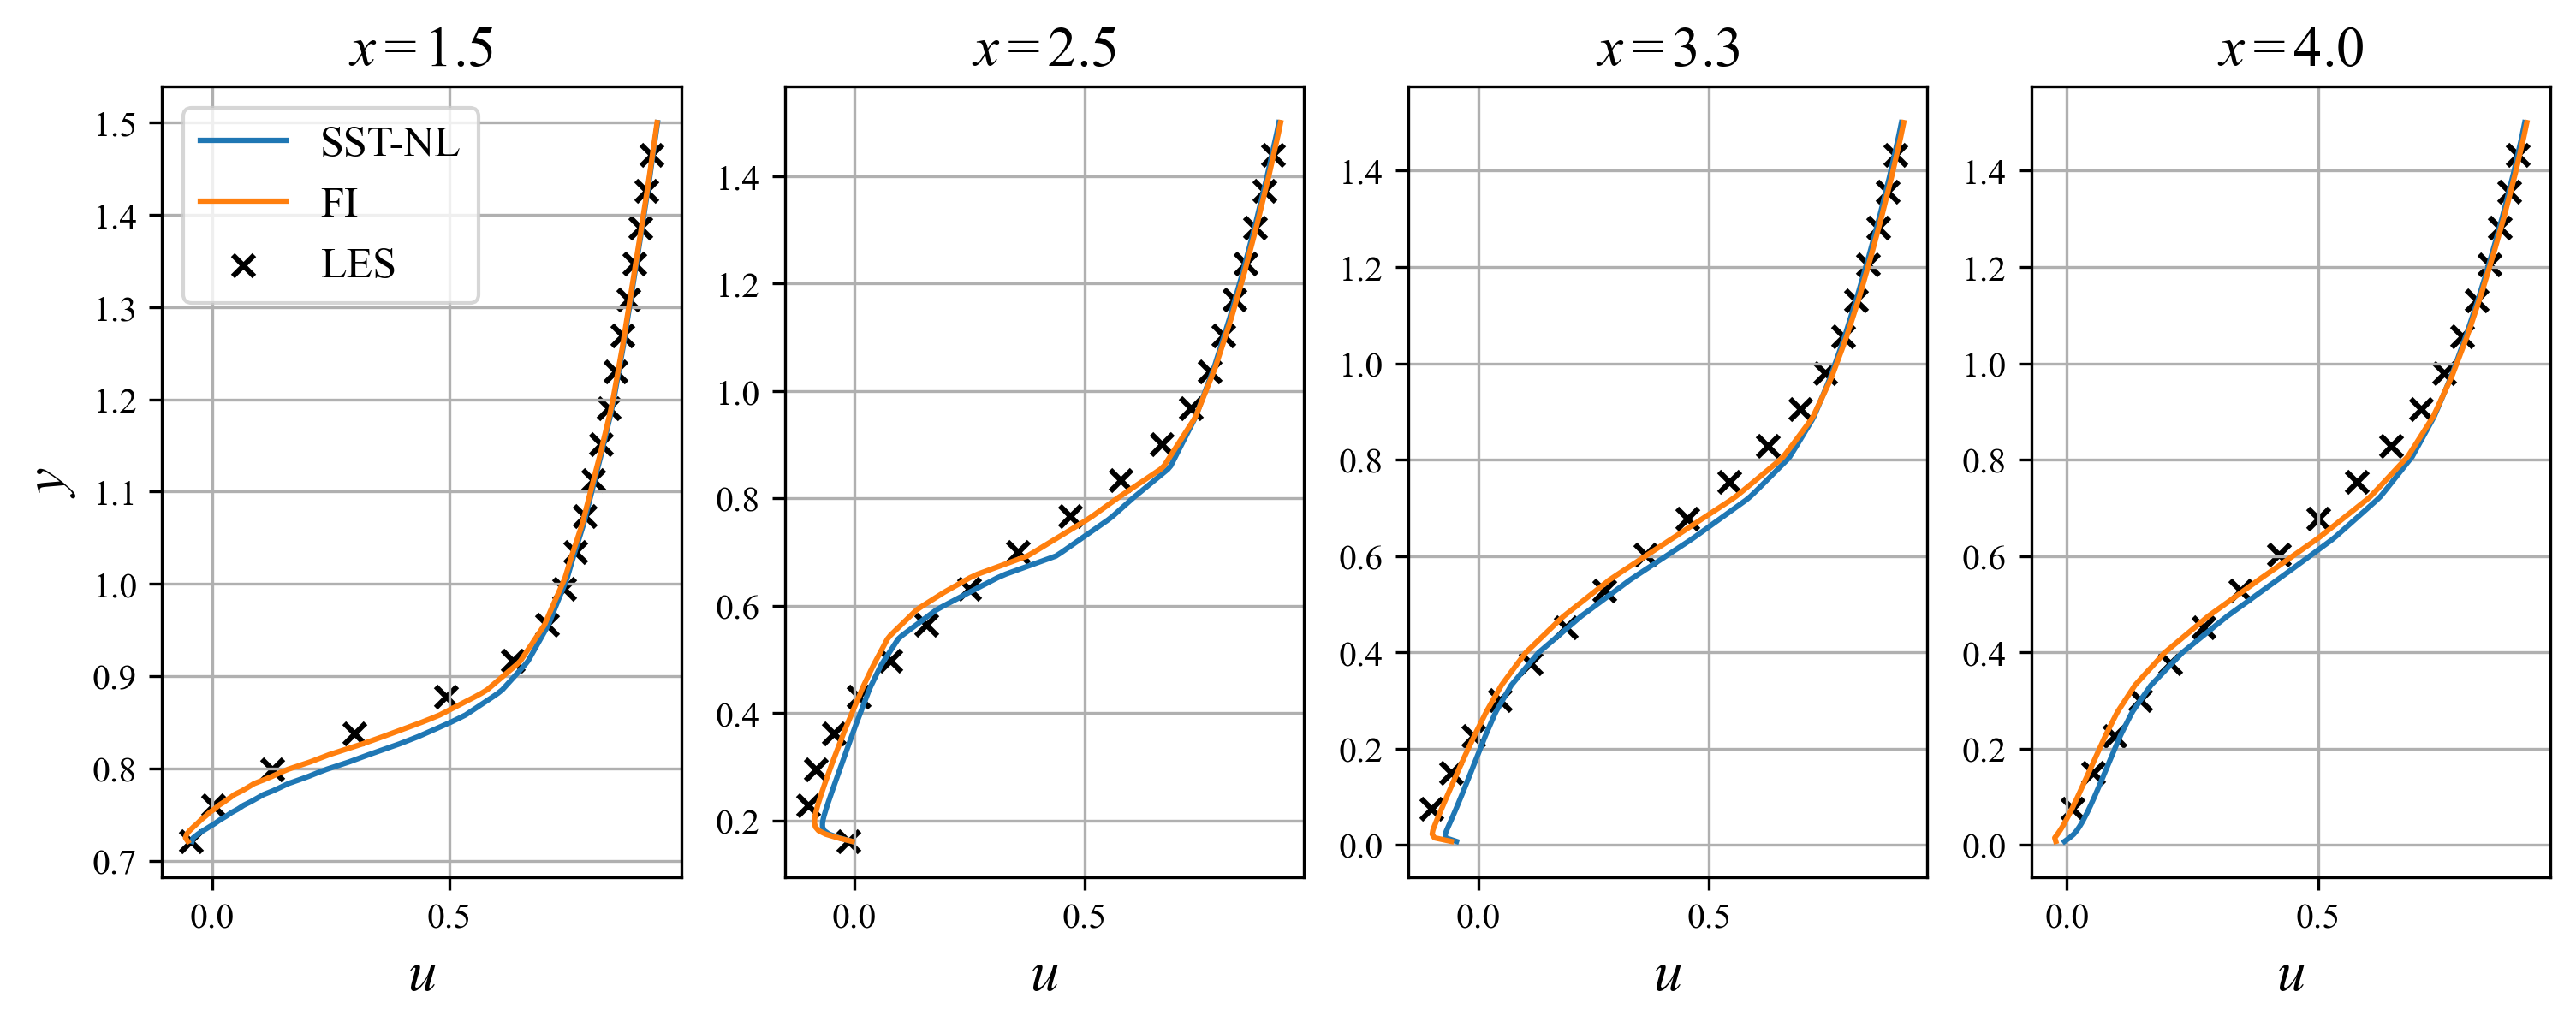

In [22]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
matplotlib.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure(dpi = 300, figsize=(12, 4))
counter=0
n = len(CBFSlines.lineData)
for key in CBFSlines.lineData:
    counter += 1
    plt.subplot(1, n, counter)
    line = CBFSlines.lineData[key]
    for case in line:
        if case == "Ref":
            continue
        plt.plot(line[case]["u"], line[case]["yy"], label=case)
        
    plt.scatter(line["Ref"]["u"], line["Ref"]["yy"], marker = "x", label="LES", c = "k")
    # plt.ylim(0, 1.5)
    
    plt.xlabel("$u$", fontsize=16)
    if counter == 1:
        plt.ylabel("$y$", fontsize = 16)
        plt.legend(fontsize="large")
    title = re.sub(r"x", r"x=", key)
    title = title.replace("p", ".")
    plt.title("$"+title+"$", fontsize=16)
    plt.grid()

In [13]:
"1p5".replace("p",".")

'1.5'

In [7]:
CBFSlines.cases["SST-NL"].fields["U"]["data"][:,0]

array([0.895075  , 0.922935  , 0.947823  , ..., 0.0510467 , 0.0279266 ,
       0.00873226])